In [27]:
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
#Read the data containing the texts
Data = pd.read_csv('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Aprendizaje profundo/Proyecto final/Archivos del proyecto/files_data_DL.csv')
Data

,pdf_texts,page_number,table_number,image_number,word_number,character_number,spec_in_url,doc_type,has_text
0,Accessories (Order Separately)\nMCCAPS – Wire ...,2,3,3,1324,7707,0,other,1
1,Project: \nLocation: \nCat.No: \nType: \nLamps...,1,3,2,837,5180,0,other,1
2,Description\nSoftglo LED night lights provide ...,2,7,6,720,4217,0,spec_sheet,1
3,TruGroove surface\nTruGroove_Surface_SpecShee...,9,18,19,4366,25714,0,spec_sheet,1
4,FEATURES & SPECIFICATIONS\nINTENDED USE — Rece...,3,3,7,1101,6734,1,spec_sheet,1
...,...,...,...,...,...,...,...,...,...
496,"LFR-4RD\nLITEFRAME 4"" ROUND DOWNLIGHT\ncurrent...",11,57,23,3637,21643,1,spec_sheet,1
497,Page 1\nS4LIP TUWH PENDANT PATTERNS 01/12/2...,7,18,4,2197,13961,1,spec_sheet,1
498,A\n_ _ _ _ _ _\n_ _ _ _ _ _\n_\nSHIELDING\nCRI...,5,17,4,2118,12693,1,spec_sheet,1
499,Rook 350 Square Pendants\n LIT-2216 • 0...,9,38,5,3726,20948,1,spec_sheet,1


In [3]:
Data = Data.drop(['pdf_texts', 'has_text'], axis=1)
Data

,page_number,table_number,image_number,word_number,character_number,spec_in_url,doc_type
0,2,3,3,1324,7707,0,other
1,1,3,2,837,5180,0,other
2,2,7,6,720,4217,0,spec_sheet
3,9,18,19,4366,25714,0,spec_sheet
4,3,3,7,1101,6734,1,spec_sheet
...,...,...,...,...,...,...,...
496,11,57,23,3637,21643,1,spec_sheet
497,7,18,4,2197,13961,1,spec_sheet
498,5,17,4,2118,12693,1,spec_sheet
499,9,38,5,3726,20948,1,spec_sheet


In [4]:
Data_y = Data['doc_type']
Data_x = Data = Data.drop(['doc_type'], axis=1)
Data_y.replace('other', 0, inplace = True)
Data_y.replace('spec_sheet', 1, inplace = True)

C:\Users\alvar\AppData\Local\Temp\ipykernel_39676\2036329689.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data_y.replace('spec_sheet', 1, inplace = True)


In [5]:
train_x, test_x, doctype_train, doctype_test = train_test_split(Data_x, Data_y, test_size=0.2, random_state=1)

In [6]:
model = Sequential()
model.add(Dense(9, input_dim=6, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(train_x, doctype_train, epochs=50, batch_size=1)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.6822 - loss: 12.8554
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.7590 - loss: 2.6420
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.7506 - loss: 1.6854
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.7580 - loss: 6.1711
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.7580 - loss: 2.3812
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.7469 - loss: 3.2654
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.7552 - loss: 2.3916
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.7287 - loss: 1.6583
Epoch 9/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.7755 - loss: 1.7132
Epoch 10/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.7000 - loss: 2.9703
Epoch 11/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.7667 - loss: 1.0115
Epoch 12/50
400/400 ━━━━━━━━━

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit_transform(Data_x)
#joblib.dump(std_scaler, 'C:/Users/alvar/Documents/Maestria en Ciencia de datos/Procesamiento y clasificación de datos/Proyecto final/PF_scaler.save')
standarized_data = std_scaler.fit_transform(Data_x)
standarized_data

array([[-0.8261755 , -0.83231671, -0.40780721, -0.51476722, -0.52903373,
        -1.04283268],
       [-1.08215195, -0.83231671, -0.43233733, -0.73388033, -0.74210249,
        -1.04283268],
       [-0.8261755 , -0.5572569 , -0.33421683, -0.78652147, -0.82329964,
        -1.04283268],
       ...,
       [-0.05824614,  0.13039262, -0.38327708, -0.15752737, -0.10862976,
         0.9589266 ],
       [ 0.96565967,  1.57445663, -0.35874696,  0.56595082,  0.58740609,
         0.9589266 ],
       [-0.8261755 , -0.6947868 , -0.40780721, -0.82296534, -0.80356949,
         0.9589266 ]])

In [10]:
train_x_std, test_x_std, doctype_train, doctype_test = train_test_split(standarized_data, Data_y, test_size=0.20, random_state=1)

In [11]:
model_std = Sequential()
model_std.add(Dense(9, input_dim=6, activation='tanh')) #input layer * 1.5
model_std.add(Dense(5, activation='relu')) #2/3 of the input layer + output kayer
model_std.add(Dense(1, activation='sigmoid'))

c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model_std.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model_std.fit(train_x_std, doctype_train, epochs=50, batch_size=1)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step - accuracy: 0.4232 - loss: 0.7351
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.8384 - loss: 0.4815
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.8510 - loss: 0.3709
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.8718 - loss: 0.3601
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.8601 - loss: 0.3529
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.8807 - loss: 0.2904
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.8419 - loss: 0.3327
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.8612 - loss: 0.3282
Epoch 9/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8970 - loss: 0.2851
Epoch 10/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8835 - loss: 0.2635
Epoch 11/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.8843 - loss: 0.2850
Epoch 12/50
400/400 ━━━━━━━━━━

In [14]:
print("Evaluate on test data")
results = model_std.evaluate(test_x_std, doctype_test)
print("test loss, test acc:", results)

Evaluate on test data
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8710 - loss: 0.3823
test loss, test acc: [0.3602275252342224, 0.8910890817642212]


In [15]:
prediction = model_std.predict(test_x_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [16]:
pred_labels = []
for label in range(len(prediction)):
    label = round(prediction[label][0])
    pred_labels.append(label)

In [17]:
model_std_accuracy = accuracy_score(doctype_test, pred_labels)
model_std_class_report = classification_report(doctype_test, pred_labels)
print("Accuracy", model_std_accuracy)
print(model_std_class_report)

Accuracy 0.8910891089108911
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        23
           1       0.92      0.94      0.93        78

    accuracy                           0.89       101
   macro avg       0.85      0.84      0.84       101
weighted avg       0.89      0.89      0.89       101



<Axes: xlabel='Predicted', ylabel='Expected'>

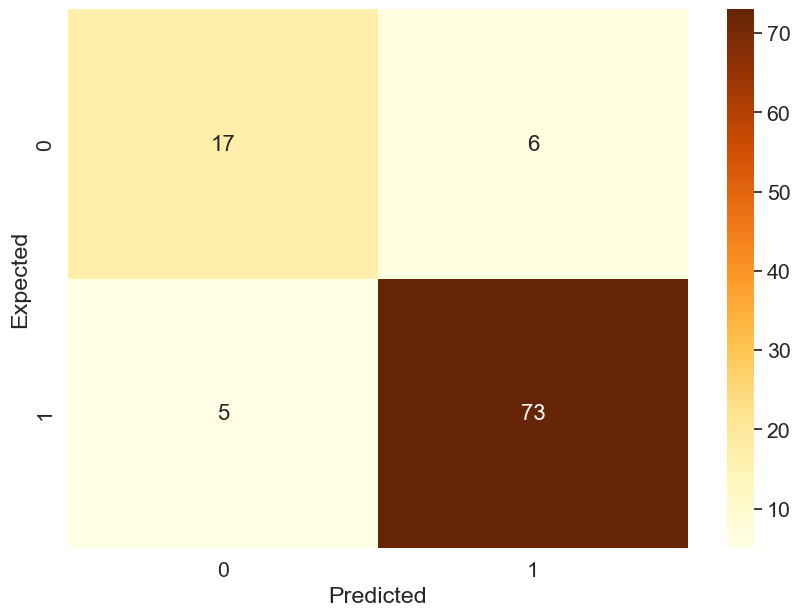

In [18]:
cm = confusion_matrix(doctype_test, pred_labels)
df_cm = pd.DataFrame(cm, columns=np.unique(doctype_test), index = np.unique(doctype_test))
df_cm.index.name = 'Expected'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="YlOrBr", annot=True,annot_kws={"size": 16})

In [23]:
a = joblib.load('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Procesamiento y clasificación de datos/Proyecto final/PF_scaler.save')

a.transform(Data_x)

array([[-0.8261755 , -0.83231671, -0.40780721, -0.51476722, -0.52903373,
        -1.04283268],
       [-1.08215195, -0.83231671, -0.43233733, -0.73388033, -0.74210249,
        -1.04283268],
       [-0.8261755 , -0.5572569 , -0.33421683, -0.78652147, -0.82329964,
        -1.04283268],
       ...,
       [-0.05824614,  0.13039262, -0.38327708, -0.15752737, -0.10862976,
         0.9589266 ],
       [ 0.96565967,  1.57445663, -0.35874696,  0.56595082,  0.58740609,
         0.9589266 ],
       [-0.8261755 , -0.6947868 , -0.40780721, -0.82296534, -0.80356949,
         0.9589266 ]])

In [25]:
model_std.save('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Procesamiento y clasificación de datos/Proyecto final/PF_model.keras')

In [50]:
b = load_model('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Procesamiento y clasificación de datos/Proyecto final/PF_model.keras')
param = np.array([[5,17,10,2239,13127,1]])
param_t = a.transform(param)

pred = b.predict(param_t)

pred[0,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.99394566

In [51]:
b = load_model('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Procesamiento y clasificación de datos/Proyecto final/PF_model.h5')
param = np.array([[5,17,10,2239,13127,1]])
param_t = a.transform(param)

pred = b.predict(param_t)

pred[0,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.99394566